# Artificial Intelligence & Machine Vision
## CN7023

---
The data for the project is taken from kaggle https://www.kaggle.com/datasets/mostafaabla/garbage-classification.

The first task was to import all the libraries needed to execute the project.

In the working directory I created a folder data with three empty directories train, val and test.


In [ ]:
import os
import glob
import random
import shutil
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

**Google Colab GPU Setup**

---

Edit the google colab environment by going to:

> Edit > Notebook Settings > Hardware Accelerator 

Click on the Drop down and select GPU. 

*Gpu Tend to increase the speed of your runs by over 1000%. It is crucial to utilize them when preparing this model*

In [ ]:
import tensorflow as tf 
tf.test.gpu_device_name()

'/device:GPU:0'

In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-536fa2e0-e0f1-cdd8-5a47-d813b3ff753b)


**Split-Folders allow a data set to be split into diffrent folders, this will all our dataset t be split into train, test and val.**

In [ ]:
!pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import splitfolders

**Downloading the Dataset**

---
The dataset used fof this model was gottn from Kaggle.

The steps needed to bring the data set to colab includes the following:

- Downloading and installing opendatasets and pandas
- visit www.kaggle.com and login to your kaggle account 
- From your Account generate a new API that will be used by COLAB to access kaggle 
- Upload the file to COLAB and change the permisions 
-  Import the opendatasets library and download your Kaggle dataset by pasting the link on it.

In [ ]:
! pip install opendatasets
! pip install pandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
print(os.getcwd())


/content


In [ ]:
import opendatasets as od
import pandas

In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"ehonorjeff","key":"783ddf9272d90874e9a707ffc41a75b0"}'}

In [ ]:
! mkdir ~/.kaggle 

In [ ]:
! cp kaggle.json ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
od.download("https://www.kaggle.com/datasets/mostafaabla/garbage-classification")

100%|██████████| 239M/239M [00:07<00:00, 33.2MB/s]


In [ ]:
! ls -lrt

total 4
drwxr-xr-x 14 root root 4096 Nov 23 10:55 garbage_classification


Change directory to the newly created data-set

In [ ]:
os.chdir('garbage-classification')


In [ ]:

os.chdir('..')

In [ ]:
! pwd

/content/garbage-classification


Create Empty directories to hold the test, train and val data during the data split.

In [ ]:
os.mkdir('train')
os.mkdir('test')
os.mkdir('val')

In [ ]:
! ls -lrt

total 16
drwxr-xr-x 14 root root 4096 Nov 23 10:55 garbage_classification
drwxr-xr-x  2 root root 4096 Nov 23 11:06 val
drwxr-xr-x  2 root root 4096 Nov 23 11:06 train
drwxr-xr-x  2 root root 4096 Nov 23 11:06 test


In [ ]:
! pwd

/content/garbage-classification


In [ ]:
! mkdir dataset

! mv test train val ./dataset

In [ ]:
! ls


dataset  garbage_classification


**Split the dataset**

In [ ]:
input_folder = '/content/garbage-classification/garbage_classification'
splitfolders.ratio(input_folder, output="dataset",
                  seed=42, ratio=(.7, .2, .1),
                  group_prefix=None)

Copying files: 15515 files [00:02, 6417.94 files/s]


In [ ]:
os.chdir('dataset/val')


In [ ]:
! ls -lrt

total 144
drwxr-xr-x 2 root root  4096 Nov 23 11:09 metal
drwxr-xr-x 2 root root 12288 Nov 23 11:09 battery
drwxr-xr-x 2 root root 12288 Nov 23 11:09 paper
drwxr-xr-x 2 root root  4096 Nov 23 11:09 green-glass
drwxr-xr-x 2 root root 36864 Nov 23 11:09 clothes
drwxr-xr-x 2 root root  4096 Nov 23 11:09 trash
drwxr-xr-x 2 root root 12288 Nov 23 11:09 biological
drwxr-xr-x 2 root root 20480 Nov 23 11:09 shoes
drwxr-xr-x 2 root root 12288 Nov 23 11:09 white-glass
drwxr-xr-x 2 root root 12288 Nov 23 11:09 plastic
drwxr-xr-x 2 root root 12288 Nov 23 11:09 cardboard
drwxr-xr-x 2 root root  4096 Nov 23 11:09 brown-glass


In [ ]:
os.chdir('../..')

In [ ]:
train_path = 'dataset/train'
valid_path = 'dataset/val'

**Check the number of image files in the training folders**

In [ ]:
len(os.listdir(train_path + '/cardboard'))

623

In [ ]:
len(os.listdir(train_path + '/green-glass'))

440

In [ ]:
len(os.listdir(train_path + '/paper'))

735

In [ ]:
len(os.listdir(train_path + '/plastic'))

605

In [ ]:
len(os.listdir(train_path + '/trash'))

487

In [ ]:
len(os.listdir(train_path + '/metal'))

538

In [ ]:
len(os.listdir(valid_path + '/metal'))

153

**Ploting the Images**

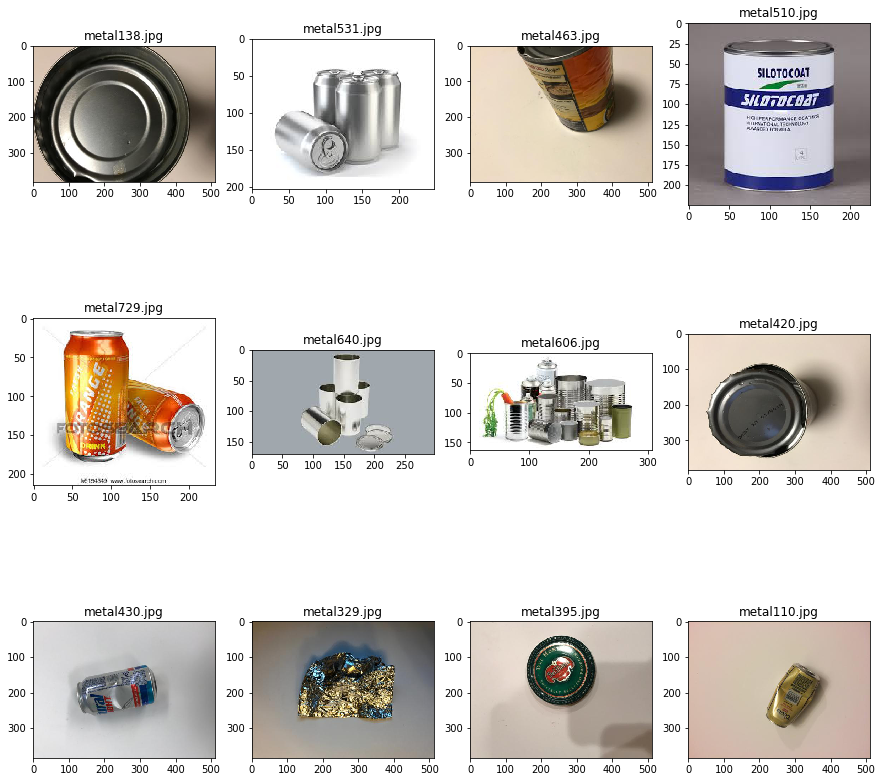

In [ ]:

fig = plt.figure(figsize = (15,15))
columns = 4
rows = 3
i = 1

for img_name in os.listdir(train_path+'/metal'):
    img = train_path + '/metal' +'/'+ img_name
    img = plt.imread(img)
    ax = fig.add_subplot(rows, columns, i)
    plt.imshow(img, interpolation = 'nearest')
    ax.title.set_text(img_name)
    i = i+1
    if i == columns*rows+1:
        break
    
plt.show()

**Displaying the first 12 images of plastic from the training set**

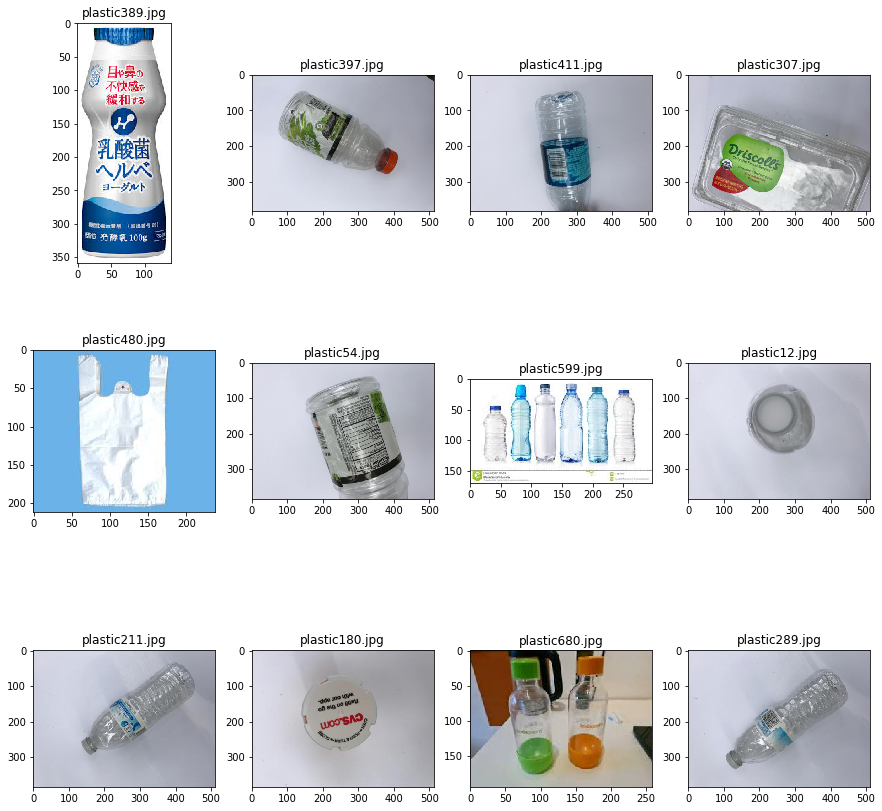

In [ ]:
fig = plt.figure(figsize = (15,15))
columns = 4
rows = 3
i = 1

for img_name in os.listdir(train_path+'/plastic'):
    img = train_path + '/plastic/' + img_name
    img = plt.imread(img)
    ax = fig.add_subplot(rows, columns, i)
    plt.imshow(img, interpolation = 'nearest')
    ax.title.set_text(img_name)
    i = i+1
    if i == columns*rows+1:
        break
    
plt.show()

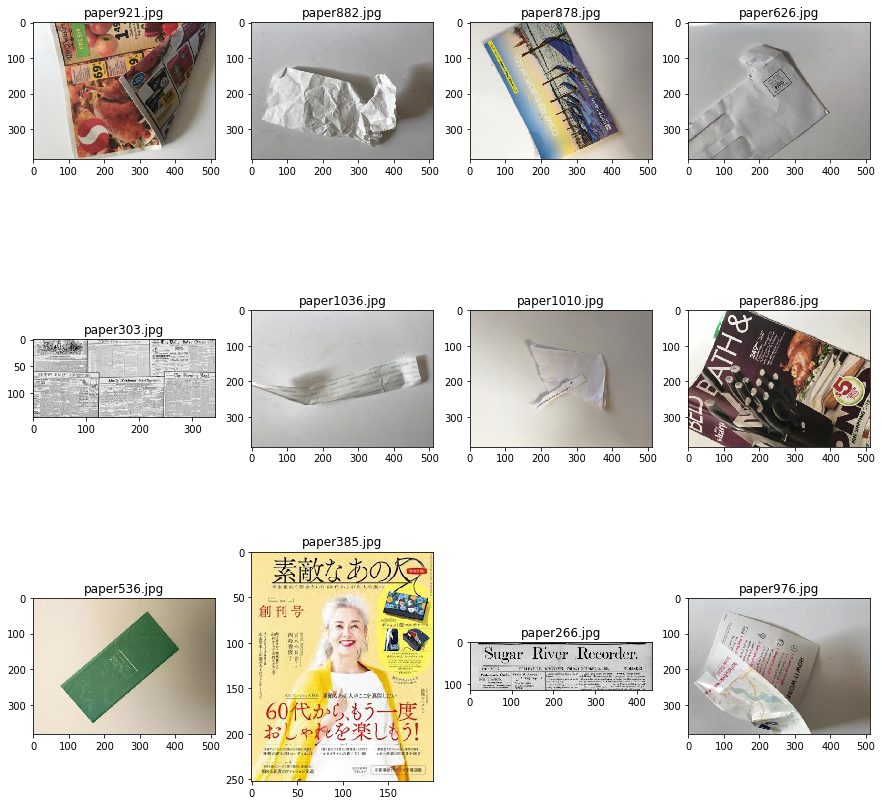

In [ ]:
fig = plt.figure(figsize = (15,15))
columns = 4
rows = 3
i = 1

for img_name in os.listdir(train_path+'/paper'):
    img = train_path + '/paper/' + img_name
    img = plt.imread(img)
    ax = fig.add_subplot(rows, columns, i)
    plt.imshow(img, interpolation = 'nearest')
    ax.title.set_text(img_name)
    i = i+1
    if i == columns*rows+1:
        break
    
plt.show()

**DATA CLEANING**

**Checking the dimension for each image**

In [ ]:
images = os.listdir(train_path + '/metal/')

In [ ]:
width, height = [], []

for image_name in images:
    img = plt.imread(train_path+ '/metal/' + image_name)
    w, h, c = img.shape
    width.append(w)
    height.append(h)

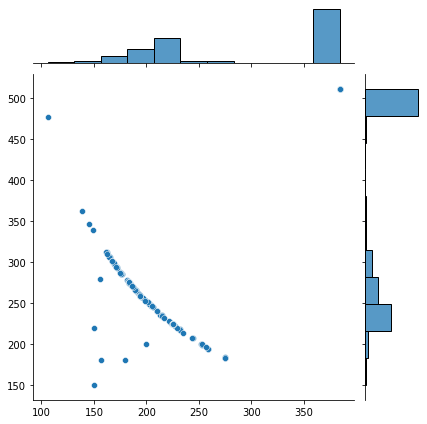

In [ ]:
sns.jointplot( x = width, y = height, kind = 'scatter')
plt.show()

**From the Scatter plot, it can be seen that the images have varying dimensions, the hight and is rescaled to the mean height and width**

In [ ]:
import numpy as np

print('Mean width: {}'.format(np.mean(width)))

print('Mean Height: {}'.format(np.mean(height)))

Mean width: 298.52044609665427
Mean Height: 384.2156133828996


In [ ]:
IMAGE_SIZE = (298, 384, 3)

In [ ]:
img_name = os.listdir(train_path + '/metal')[0]
img = plt.imread(train_path+'/metal/'+img_name)

print('Maximum pizel value: {}'.format(np.max(img)))

print('Minimum pizel value: {}'.format(np.min(img)))

## Image is not scaled

Maximum pizel value: 255
Minimum pizel value: 0


**Creating Image Data Generator for Training and Validation set**

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255, rotation_range = 20,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               horizontal_flip=True)

valid_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
train_batches = train_datagen.flow_from_directory(directory = train_path,
                                                 target_size = (298, 384),
                                                 classes = ['cardboard', 'metal','paper','plastic','trash','green-glass','white-glass','brown-glass','clothes','biological','battery','shoes'],
                                                 batch_size = 10,
                                                 shuffle = True, class_mode = 'categorical')

valid_batches = valid_datagen.flow_from_directory(directory = valid_path,
                                                 target_size = (298, 384),
                                                 classes = ['cardboard', 'metal','paper','plastic','trash','green-glass','white-glass','brown-glass','clothes','biological','battery','shoes'],
                                                 batch_size = 10,
                                                 shuffle = False, class_mode = 'categorical')

Found 10854 images belonging to 12 classes.
Found 3100 images belonging to 12 classes.


In [ ]:
train_batches.class_indices

{'cardboard': 0,
 'metal': 1,
 'paper': 2,
 'plastic': 3,
 'trash': 4,
 'green-glass': 5,
 'white-glass': 6,
 'brown-glass': 7,
 'clothes': 8,
 'biological': 9,
 'battery': 10,
 'shoes': 11}

In [ ]:
imgs, labels = next(train_batches) ## getting first 10 images (1st batch)

## Everytime this line of code is run next 10 images are selected

**It can be observed that the images in the batch have all been resized**

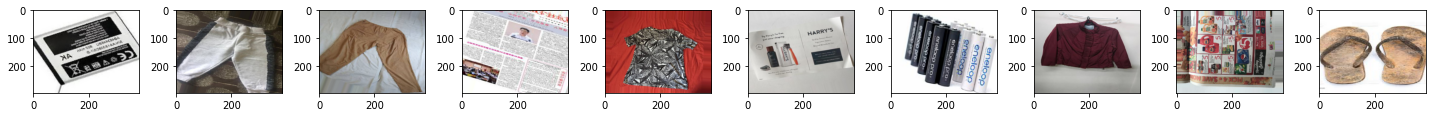

In [ ]:
fig, axes = plt.subplots(1, 10, figsize = (20,20))
axes = axes.flatten()
for img, ax in zip(imgs, axes):
    ax.imshow(img)
plt.tight_layout()
plt.show()

THe Array below has 12 cells with each cell representing aspecific category 

In [ ]:
labels

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [ ]:
img = imgs[0]

print('Maximum pixel value: {}'.format(np.max(img)))

print('Minimum pixel value: {}'.format(np.min(img)))

Maximum pixel value: 1.0
Minimum pixel value: 0.0


### CNN Model Creation

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model = Sequential()

model.add(Convolution2D(filters = 128, kernel_size =  (3,3), input_shape = (298,384,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Convolution2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Convolution2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(Convolution2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())
model.add(Dense(units = 128 , activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(units = 12 , activation = 'softmax'))

In [ ]:
model.compile(optimizer = 'adam' ,
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 296, 382, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 148, 191, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 189, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 94, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 92, 64)        73792     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 90, 64)        3

In [ ]:
r = model.fit(train_batches,
                        steps_per_epoch = len(train_batches),
                        epochs = 10,
                        validation_data = valid_batches,
                        validation_steps = len(valid_batches),
                        callbacks = EarlyStopping(monitor='val_loss', patience = 2))

Epoch 1/10
1086/1086 [==============================] - 316s 282ms/step - loss: 1.6961 - accuracy: 0.4491 - val_loss: 1.3835 - val_accuracy: 0.5510
Epoch 2/10
1086/1086 [==============================] - 307s 282ms/step - loss: 1.3322 - accuracy: 0.5600 - val_loss: 1.1326 - val_accuracy: 0.6213
Epoch 3/10
1086/1086 [==============================] - 304s 280ms/step - loss: 1.1797 - accuracy: 0.6088 - val_loss: 1.1061 - val_accuracy: 0.6471
Epoch 4/10
1086/1086 [==============================] - 303s 279ms/step - loss: 1.1213 - accuracy: 0.6278 - val_loss: 1.0123 - val_accuracy: 0.6623
Epoch 5/10
1086/1086 [==============================] - 303s 279ms/step - loss: 1.0525 - accuracy: 0.6607 - val_loss: 0.9673 - val_accuracy: 0.6794
Epoch 6/10
1086/1086 [==============================] - 304s 280ms/step - loss: 1.0120 - accuracy: 0.6699 - val_loss: 0.9351 - val_accuracy: 0.6845
Epoch 7/10
1086/1086 [==============================] - 302s 278ms/step - loss: 0.9749 - accuracy: 0.6778 - val_

In [ ]:
r.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

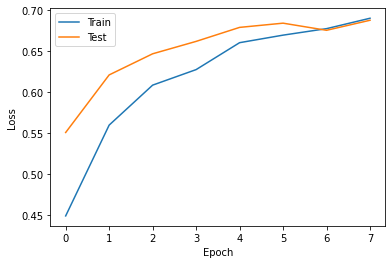

In [ ]:
plt.plot(r.history['accuracy'], label = 'Train')
plt.plot(r.history['val_accuracy'], label = 'Test')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.evaluate(train_batches)
#train_batches.classes

1086/1086 [==============================] - 271s 249ms/step - loss: 0.8590 - accuracy: 0.7105


[0.8589759469032288, 0.7105214595794678]

In [ ]:
model.evaluate(valid_batches)

310/310 [==============================] - 19s 61ms/step - loss: 0.9774 - accuracy: 0.6881


[0.9774109125137329, 0.6880645155906677]

In [ ]:
train_pred = model.predict(train_batches)

1086/1086 [==============================] - 297s 274ms/step


In [ ]:
train_classes_pred = np.argmax(train_pred, axis = 1)

In [ ]:
train_classes_pred

array([9, 2, 4, ..., 9, 0, 8])

In [ ]:
train_classes_actual = train_batches.classes

In [ ]:
train_classes_actual

array([ 0,  0,  0, ..., 11, 11, 11], dtype=int32)

In [ ]:
from sklearn.utils.multiclass import type_of_target
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
valid_classes = model.predict(valid_batches)
valid_classes_pred = np.argmax(valid_classes, axis = 1)
valid_classes_actual = valid_batches.classes
cm = confusion_matrix(valid_classes_actual, valid_classes_pred)
print(train_batches.class_indices)
#print(cm)
print(f"Accuracy: {accuracy_score(valid_classes_actual, valid_classes_pred)}")

310/310 [==============================] - 17s 55ms/step
{'cardboard': 0, 'metal': 1, 'paper': 2, 'plastic': 3, 'trash': 4, 'green-glass': 5, 'white-glass': 6, 'brown-glass': 7, 'clothes': 8, 'biological': 9, 'battery': 10, 'shoes': 11}
Accuracy: 0.6880645161290323


[Text(0, 0.5, 'cardboard'),
 Text(0, 1.5, 'metal'),
 Text(0, 2.5, 'paper'),
 Text(0, 3.5, 'plastic'),
 Text(0, 4.5, 'trash'),
 Text(0, 5.5, 'green-glass'),
 Text(0, 6.5, 'white-glass'),
 Text(0, 7.5, 'brown-glass'),
 Text(0, 8.5, 'clothes'),
 Text(0, 9.5, 'biological'),
 Text(0, 10.5, 'battery'),
 Text(0, 11.5, 'shoes')]

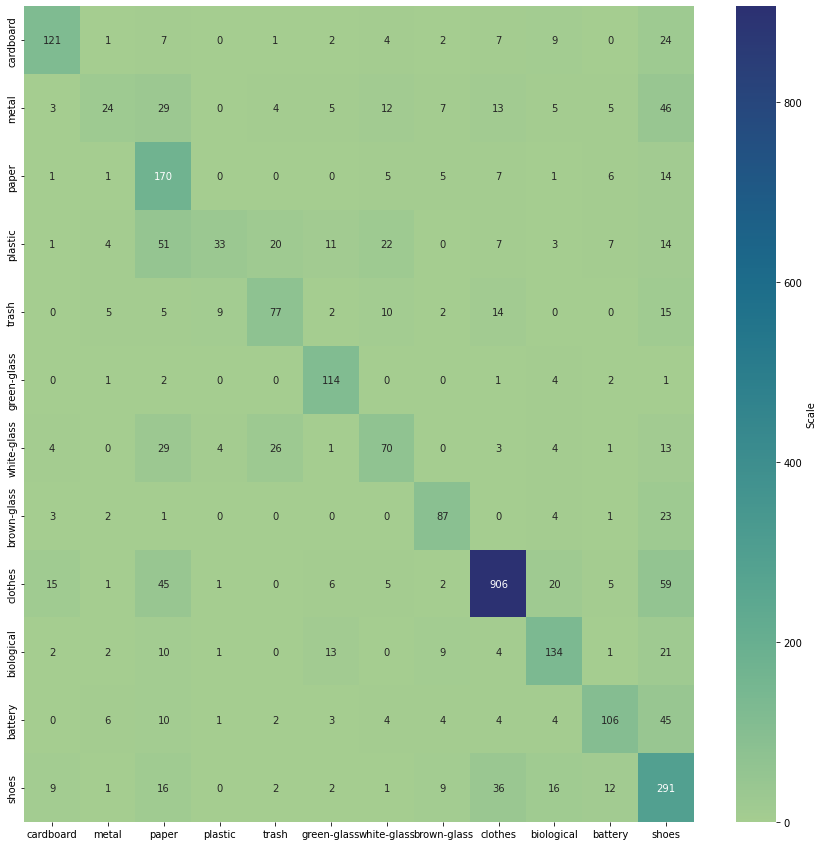

In [ ]:
sns.color_palette("crest", as_cmap=True)
plt.figure(figsize=(15,15))
ax = sns.heatmap(cm, annot=True, cmap="crest", fmt='d', cbar_kws={'label': 'Scale'})
labels=list(train_batches.class_indices.keys())
ax.set_xticklabels(labels)
ax.set_yticklabels(labels)

In [ ]:
model.save('garbmlcnn.h5')

In [ ]:
from IPython.display import FileLink
FileLink(r'garbmlcnn.h5')

/content/garbage-classification/garbmlcnn.h5

In [ ]:
ls


dataset/  garbage_classification/  garbmlcnn.h5


In [ ]:
ls


dataset/  garbage_classification/  garbmlcnn.h5


In [ ]:
! du -h *

2.3M	dataset/val/metal
1.6M	dataset/val/battery
4.0M	dataset/val/paper
1.1M	dataset/val/green-glass
31M	dataset/val/clothes
796K	dataset/val/trash
2.1M	dataset/val/biological
5.0M	dataset/val/shoes
1.4M	dataset/val/white-glass
2.1M	dataset/val/plastic
2.4M	dataset/val/cardboard
1.1M	dataset/val/brown-glass
54M	dataset/val
7.2M	dataset/train/metal
5.3M	dataset/train/battery
15M	dataset/train/paper
3.8M	dataset/train/green-glass
108M	dataset/train/clothes
2.7M	dataset/train/trash
7.3M	dataset/train/biological
18M	dataset/train/shoes
5.0M	dataset/train/white-glass
7.6M	dataset/train/plastic
7.7M	dataset/train/cardboard
3.7M	dataset/train/brown-glass
190M	dataset/train
1.2M	dataset/test/metal
820K	dataset/test/battery
2.0M	dataset/test/paper
584K	dataset/test/green-glass
15M	dataset/test/clothes
388K	dataset/test/trash
1.2M	dataset/test/biological
2.4M	dataset/test/shoes
784K	dataset/test/white-glass
1.2M	dataset/test/plastic
1.2M	dataset/test/cardboard
592K	dataset/test/brown-glass
27M	da

In [6]:
! python --version

Python 3.7.15
